In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn as sns

%matplotlib inline

In [2]:
corona_cases = pd.read_csv('../data/time_series-ncov-Confirmed.csv', parse_dates=['Date'], skiprows=[1])
corona_cases = corona_cases.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_cases"})
corona_cases = corona_cases.fillna(0)
corona_cases.location[corona_cases.location == 'US'] = 'United States of America'
corona_cases = corona_cases.sort_values(['date', 'total_cases'])
today = datetime.today().strftime('%d-%m-%Y')
corona_cases.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_cases
61,0,Afghanistan,33.0000,65.0000,2020-01-22,0.0
123,0,Albania,41.1533,20.1683,2020-01-22,0.0
185,0,Algeria,28.0339,1.6596,2020-01-22,0.0
247,0,Andorra,42.5063,1.5218,2020-01-22,0.0
309,0,Angola,-11.2027,17.8739,2020-01-22,0.0


In [3]:
# Summing up the total_cases for the countries that are seprated by province

countries = corona_cases[corona_cases.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': corona_cases[corona_cases.location == country].date.max(),
        'total_cases': sum(corona_cases.total_cases[(corona_cases.location == country) & (corona_cases.date == corona_cases[corona_cases.location == country].date.max())])
    }
    corona_cases = corona_cases.append(total, ignore_index=True)


corona_cases = corona_cases.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 



In [4]:
death_dataset = pd.read_csv('../data/time_series-ncov-Death.csv', parse_dates=['Date'], skiprows=[1])
death_dataset = death_dataset.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_deaths"})
death_dataset = death_dataset.fillna(0)
death_dataset.location[death_dataset.location == 'US'] = 'United States of America'
death_dataset = death_dataset.sort_values(['date', 'total_deaths'])
death_dataset.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_deaths
61,0,Afghanistan,33.0000,65.0000,2020-01-22,0.0
123,0,Albania,41.1533,20.1683,2020-01-22,0.0
185,0,Algeria,28.0339,1.6596,2020-01-22,0.0
247,0,Andorra,42.5063,1.5218,2020-01-22,0.0
309,0,Angola,-11.2027,17.8739,2020-01-22,0.0


In [5]:
# Summing up the total_cases for the countries that are seprated by province

countries = death_dataset[death_dataset.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': death_dataset[death_dataset.location == country].date.max(),
        'total_deaths': sum(death_dataset.total_deaths[(death_dataset.location == country) & (death_dataset.date == death_dataset[death_dataset.location == country].date.max())])
    }
    death_dataset = death_dataset.append(total, ignore_index=True)


death_dataset = death_dataset.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 


In [6]:
world_map = gpd.read_file('../maps/world/ne_10m_admin_0_countries.shp')

In [7]:
death_map = world_map.set_index('SOVEREIGNT').join(death_dataset.set_index('location'))
death_map = death_map.fillna(0)
death_map = death_map[death_map.ADMIN != 'Antarctica']

In [8]:
corona_map = world_map.set_index('SOVEREIGNT').join(corona_cases.set_index('location'))
# corona_map = corona_map.fillna(0)
corona_map = corona_map[corona_map.ADMIN != 'Antarctica']

## Corona Death rate

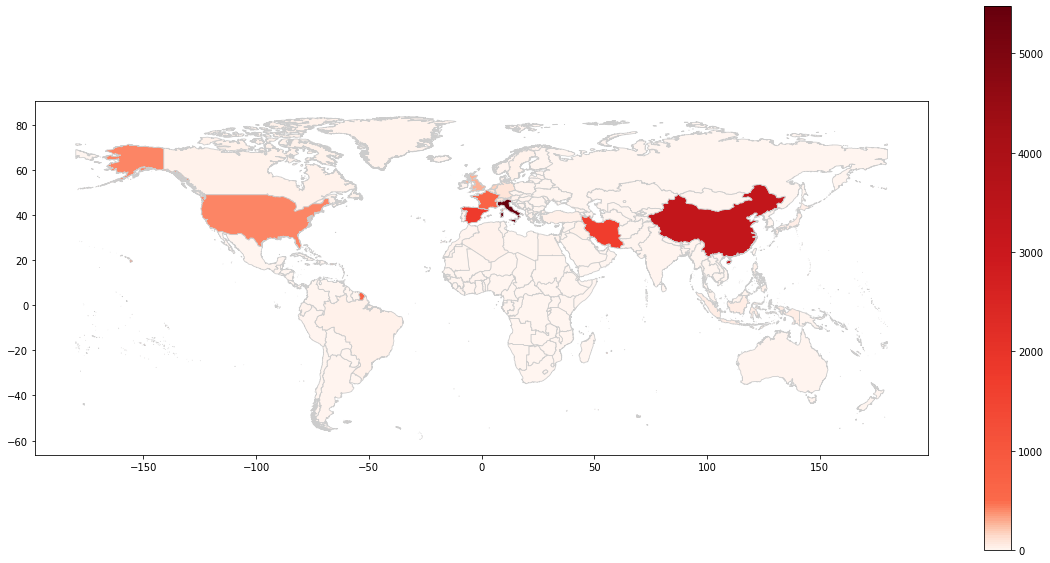

In [9]:
variable = 'total_deaths'
# set the range for the choropleth
vmin, vmax = 10, death_map.total_deaths.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
divnorm = colors.DivergingNorm(vmin=0, vcenter=500, vmax=vmax)

death_map.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=divnorm)
plt.show()
ax.axis('off')


# add a title
ax.set_title('Corona Death rate', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Mohammed Alawami!',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')


fig.savefig('testmap.png', dpi=300)
plt.show()


## Corona Cases

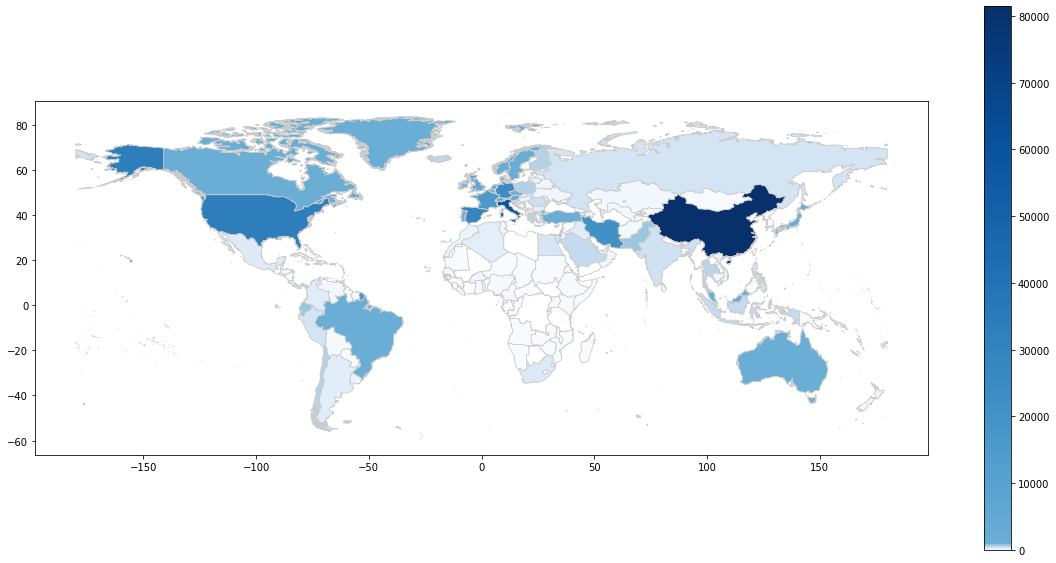

In [10]:
variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = 10, corona_map.total_cases.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
cmap = 'Blues'

divnorm = colors.DivergingNorm(vmin=0, vcenter=1000, vmax=vmax)

corona_map.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=divnorm, legend=True, missing_kwds={"color": "white"})
plt.show()
ax.axis('off')
# add a title
ax.set_title('Corona Cases', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Mohammed Alawami!',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')
plt.show()

fig.savefig('testmap2.png', dpi=300)

### Possible color values are:
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

## Saudi Map

In [11]:
saudi_map = gpd.read_file('../maps/saudi/mygeodata/Saudi_District_KML-polygon.shp')
saudi_map

,Name,descriptio,altitudeMo,Descript_1,ID_0,ISO,NAME_0,ID_1,NL_NAME_1,HASC_1,CC_1,TYPE_1,ENGTYPE_1,VALIDFR_1,VALIDTO_1,REMARKS_1,Shape_Leng,Shape_Area,geometry
0,`Asir,Asir|Aseer|Assyear,relativeToGround,None,192,SAU,Saudi Arabia,2609,None,SA.AS,None,Emirate|Mintaqah,Region,Unknown,Present,None,12.850359,6.635588,"POLYGON ((43.83472 20.83944, 43.85555 20.81500..."
1,Makkah,La Meca|La Mecca|La Mecque|Makka|Makkah al-Muk...,relativeToGround,None,192,SAU,Saudi Arabia,2619,None,SA.MK,None,Emirate|Mintaqah,Region,Unknown,Present,None,40.639999,12.035293,"MULTIPOLYGON (((40.78514 18.06431, 40.78514 18..."
2,Al Bahah,Baha,relativeToGround,None,192,SAU,Saudi Arabia,2610,None,SA.BA,None,Emirate|Mintaqah,Region,Unknown,Present,None,4.585875,0.891075,"POLYGON ((41.49833 20.57222, 41.51944 20.56555..."
3,Najran,None,relativeToGround,None,192,SAU,Saudi Arabia,2620,None,SA.NJ,None,Emirate|Mintaqah,Region,Unknown,Present,None,12.551626,7.545177,"POLYGON ((47.74347 19.53071, 47.70333 19.25333..."
4,Tabuk,Tabouk,relativeToGround,None,192,SAU,Saudi Arabia,2621,None,SA.TB,None,Emirate|Mintaqah,Region,Unknown,Present,None,34.631184,9.046078,"MULTIPOLYGON (((37.20570 24.82208, 37.20570 24..."
5,Al Hudud ash Shamaliyah,Northern Frontier,relativeToGround,None,192,SAU,Saudi Arabia,2611,None,SA.HS,None,Emirate|Mintaqah,Region,1980,Present,None,23.669370,10.950090,"POLYGON ((40.20442 31.93678, 42.57660 30.49607..."
6,Al Jawf,JawfAl Joaf|Al-Jouf|Jowf,relativeToGround,None,192,SAU,Saudi Arabia,2612,None,SA.JF,None,Emirate|Mintaqah,Region,Unknown,Present,None,20.734991,10.900472,"MULTIPOLYGON (((34.90847 29.20903, 34.90847 29..."
7,Al Madinah,Madinah|Al Madinah al Munawwarah|Monwarah|Medi...,relativeToGround,None,192,SAU,Saudi Arabia,2613,None,SA.MD,None,Emirate|Mintaqah,Region,Unknown,Present,None,22.986212,12.883574,"MULTIPOLYGON (((38.58264 23.53764, 38.58264 23..."
8,Al Quassim,Al Gassim|Gasim|Qaseem|Al Qasseem,relativeToGround,None,192,SAU,Saudi Arabia,2614,None,SA.QS,None,Emirate|Mintaqah,Region,Unknown,Present,None,11.240767,4.906294,"POLYGON ((44.26415 27.08444, 44.29082 27.08277..."
9,Ar Riyad,Riyad|Riad|Riyadh,relativeToGround,None,192,SAU,Saudi Arabia,2615,None,SA.RI,None,Emirate|Mintaqah,Region,Unknown,Present,None,26.316864,33.301432,"POLYGON ((45.08639 27.47250, 45.12917 27.43777..."


In [30]:
saudi_cases = pd.read_excel('../data/corona_cases_ksa.xlsx')
saudi_cases

,date,city,province,total_cases,new_cases,from,nationality,map_name
0,2020-03-02,Qatif,Eastern province,1,1,Iran,Saudi,Ash Sharqiyah
1,2020-03-04,Qatif,Eastern province,2,1,Iran,Saudi,Ash Sharqiyah
2,2020-03-05,Qatif,Eastern province,5,3,Iran,Saudi,Ash Sharqiyah
3,2020-03-07,Qatif,Eastern province,6,1,Iran,Saudi,Ash Sharqiyah
4,2020-03-07,Qatif,Eastern province,7,1,Iraq,Saudi,Ash Sharqiyah
...,...,...,...,...,...,...,...,...
141,2020-03-24,Dammam,Eastern province,759,6,NaN,NaN,Ash Sharqiyah
142,2020-03-24,Jizan,Jizan,762,3,NaN,NaN,Jizan
143,2020-03-24,Kobar,Eastern province,764,2,NaN,NaN,Ash Sharqiyah
144,2020-03-24,Dhahran,Eastern province,766,2,NaN,NaN,Ash Sharqiyah


In [31]:
saudi_province = saudi_cases.groupby(['province', 'map_name']).agg({'new_cases': sum}).reset_index()
saudi_province = saudi_province.rename(columns={'new_cases': 'total_cases'})
saudi_province

,province,map_name,total_cases
0,Al Bahah,Al Bahah,13
1,Al Quassim,Al Quassim,1
2,Asir,`Asir,22
3,Eastern province,Ash Sharqiyah,210
4,Jizan,Jizan,7
5,Makkah,Makkah,215
6,Medinah,Al Madinah,2
7,Najran,Najran,9
8,Riyadh,Ar Riyad,287
9,Tabuk,Tabouk,1


In [32]:
saudi = saudi_cases.groupby(['date']).agg({'new_cases': sum, 'total_cases': max}).reset_index()
saudi

,date,new_cases,total_cases
0,2020-03-02,1,1
1,2020-03-04,1,2
2,2020-03-05,3,5
3,2020-03-07,2,7
4,2020-03-08,4,11
5,2020-03-09,4,15
6,2020-03-10,5,20
7,2020-03-11,25,45
8,2020-03-12,17,62
9,2020-03-13,24,86


In [15]:
MOH_hospital_beds = pd.read_excel('../data/rate_of_moh_hospital_beds.xlsx')

In [33]:
saudi_corona_map = saudi_map.set_index('Name').join(saudi_province.set_index('map_name'))

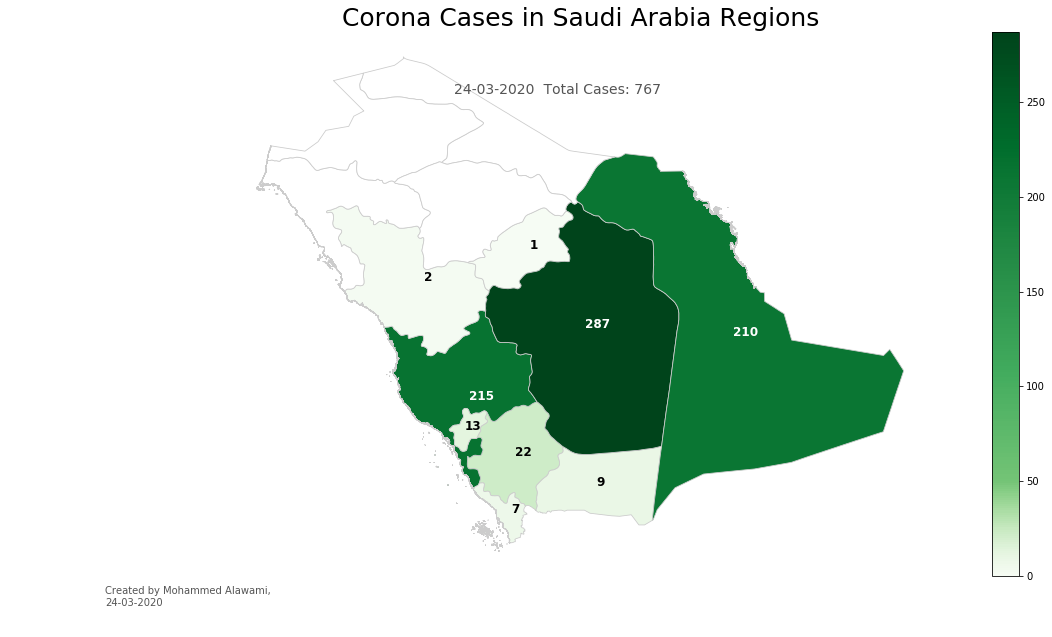

In [35]:
saudi_corona_map["rep"] = saudi_corona_map["geometry"].representative_point()
za_points = saudi_corona_map.copy()
za_points.set_geometry("rep", inplace = True)

variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = saudi_corona_map.total_cases.min(), saudi_corona_map.total_cases.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
cmap = 'Greens'

divnorm = colors.DivergingNorm(vmin=0, vcenter=50, vmax=vmax)

saudi_corona_map.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=divnorm, legend=True, missing_kwds={"color": "white"})


texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["total_cases"]):
    if np.isnan(label) == False:
        if label > 25:
            texts.append(plt.text(x, y, int(label), fontsize = 12, weight='bold', color='white'))
        else:
            texts.append(plt.text(x, y, int(label), fontsize = 12, weight='bold', color='Black'))

ax.axis('off');

# add a title
title = 'Corona Cases in Saudi Arabia Regions'
ax.set_title(title, 
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# ax.set_xlabel(today, fontsize=10)
ax.annotate(today,
           xy=(.47, 0.87), xycoords='figure fraction',
           horizontalalignment='center', verticalalignment='top',
           fontsize=14, color='#555555')

ann = ' Total Cases: {}'.format(sum(saudi_province.total_cases))
ax.annotate(ann,
           xy=(.57, 0.87), xycoords='figure fraction',
           horizontalalignment='center', verticalalignment='top',
           fontsize=14, color='#555555')

# create an annotation for the  data source
ann = 'Created by Mohammed Alawami, \n{}'.format(today)
ax.annotate(ann,
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')





plt.show()

fig.savefig('saudimap.png', dpi=300)